In [10]:
import get_data
import numpy as np
import pandas as pd
import cv2

# getting a dataframe describing all images

the `rel_fp` column is the filepath of the image relative to the root of this directory (assuming you unzipped the data from box and left it in the folder named `MFGTMP_220317120003`)

In [11]:
df_images = get_data.load_images_df()
df_images.head()

,column,row,field,channel,rel_fp
0,B,3,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B03f02...
1,H,3,1,2,MFGTMP_220317120003/MFGTMP_220317120003_H03f01...
2,B,2,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B02f02...
3,F,1,2,2,MFGTMP_220317120003/MFGTMP_220317120003_F01f02...
4,A,1,7,1,MFGTMP_220317120003/MFGTMP_220317120003_A01f07...


# getting an image as a numpy array

In [12]:
example_img_path = df_images['rel_fp'].values[0]
img_arr = get_data.file_to_nparray(example_img_path)
img_arr.shape

(1104, 1104)

# Create Column with Blur Coeficient

In [13]:
df_images["Blur_Coef"] = 0
for i in range(len(df_images.index)):
    img = cv2.imread(df_images['rel_fp'].values[i])
    try:
        laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
        df_images.at[i,'Blur_Coef']=laplacian_var
    except:
        print("File Read Issue")
        print("Setting Blur_Coef to -1")
        df_images.at[i,'Blur_Coef']=laplacian_var
        print("indx", i )
        print("file, ",df_images['rel_fp'].values[i])
df_images.head()

File Read Issue
Setting Blur_Coef to -1
indx 751
file,  MFGTMP_220317120003/MFGTMP_220317120003_H03f08d4.TIF


,column,row,field,channel,rel_fp,Blur_Coef
0,B,3,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B03f02...,1.733168
1,H,3,1,2,MFGTMP_220317120003/MFGTMP_220317120003_H03f01...,1.773876
2,B,2,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B02f02...,1.691270
3,F,1,2,2,MFGTMP_220317120003/MFGTMP_220317120003_F01f02...,1.322336
4,A,1,7,1,MFGTMP_220317120003/MFGTMP_220317120003_A01f07...,1.234159


# Create Boolean Column "Blurry"

In [14]:
threshold = .5
df_images['Blurry'] = df_images.apply(lambda row: row.Blur_Coef < threshold , axis = 1)
df_images.head()

,column,row,field,channel,rel_fp,Blur_Coef,Blurry
0,B,3,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B03f02...,1.733168,False
1,H,3,1,2,MFGTMP_220317120003/MFGTMP_220317120003_H03f01...,1.773876,False
2,B,2,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B02f02...,1.691270,False
3,F,1,2,2,MFGTMP_220317120003/MFGTMP_220317120003_F01f02...,1.322336,False
4,A,1,7,1,MFGTMP_220317120003/MFGTMP_220317120003_A01f07...,1.234159,False


# Filter out only the images that we need

In [36]:
relevant_rows = df_images[df_images['column'].isin(['A', 'B', 'E', 'H'])]
relevant_channels = relevant_rows[relevant_rows['channel'].isin([4])]
no_blur = relevant_channels[relevant_channels['Blurry'].isin([False])]
hoechst_paths = no_blur['rel_fp'].values
print(hoechst_paths.shape)

rox_paths = []
for path in hoechst_paths:
    # print(len("stretched/MFGTMP_220317120003_H03f04d4.TIF"))
    rox_path = path[0:47] + "3" + path[48:]
    rox_paths.append(rox_path)
rox_paths = np.array(rox_paths)
print(rox_paths.shape)

img_paths = np.concatenate([hoechst_paths, rox_paths])
print(img_paths.shape)
print(img_paths)

(108,)
(108,)
(216,)


# Contrast stretching an image

In [16]:
from PIL import Image

example_img_path = img_paths[0]
img_arr = get_data.file_to_nparray(example_img_path)
stretched_img = get_data.stretch_img(img_arr)
im = Image.fromarray(stretched_img)
im.save("ex1.TIF")

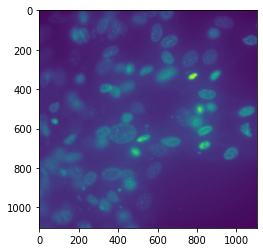

In [17]:
from matplotlib import pyplot as plt

plt.imshow(stretched_img)

# Contrast stretching all images for untreated / hydrogen peroxide (rows A, B, E, H)

In [23]:
relevant_rows = df_images[df_images['column'].isin(['A', 'B', 'E', 'H'])]
relevant_channels = relevant_rows[relevant_rows['channel'].isin([3])]
no_blur = relevant_channels[relevant_channels['Blurry'].isin([False])]
img_paths = no_blur['rel_fp'].values
print(img_paths.shape)

for path in img_paths:
    img_arr = get_data.file_to_nparray(path)
    stretched_img = get_data.stretch_img(img_arr)
    im = Image.fromarray(stretched_img)
    new_path = "stretched2/" + path[20:]
    print(new_path)
    im.save(new_path)

(212,)
stretched2/MFGTMP_220317120003_B03f02d4.TIF
stretched2/MFGTMP_220317120003_B02f02d4.TIF
stretched2/MFGTMP_220317120003_H01f08d4.TIF
stretched2/MFGTMP_220317120003_A01f05d3.TIF
stretched2/MFGTMP_220317120003_E02f03d3.TIF
stretched2/MFGTMP_220317120003_E03f03d3.TIF
stretched2/MFGTMP_220317120003_H02f07d4.TIF
stretched2/MFGTMP_220317120003_H03f07d4.TIF
stretched2/MFGTMP_220317120003_B03f04d3.TIF
stretched2/MFGTMP_220317120003_B02f04d3.TIF
stretched2/MFGTMP_220317120003_A01f03d4.TIF
stretched2/MFGTMP_220317120003_E02f05d4.TIF
stretched2/MFGTMP_220317120003_E03f05d4.TIF
stretched2/MFGTMP_220317120003_H02f01d3.TIF
stretched2/MFGTMP_220317120003_H03f01d3.TIF
stretched2/MFGTMP_220317120003_E02f07d4.TIF
stretched2/MFGTMP_220317120003_E03f07d4.TIF
stretched2/MFGTMP_220317120003_H02f03d3.TIF
stretched2/MFGTMP_220317120003_H03f03d3.TIF
stretched2/MFGTMP_220317120003_B03f06d3.TIF
stretched2/MFGTMP_220317120003_B02f06d3.TIF
stretched2/MFGTMP_220317120003_A01f01d4.TIF
stretched2/MFGTMP_2203171

KeyboardInterrupt: 